In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0   5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2   0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134 138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241 177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

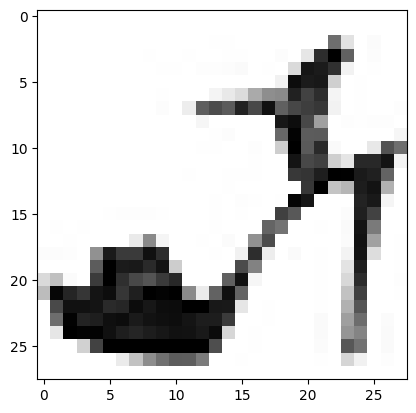

In [7]:
index = 9
np.set_printoptions(linewidth=320)
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')
plt.imshow(train_images[index], cmap='Greys')

In [8]:
# Normalize the image dari yang tadinya 0-255, menjadi 0-1. karena neural network akan lebih baik memproses jika direpresentasikan 0-1
train_images = train_images / 255.0 # devide the entire of array with the max value
test_iamges = test_images/ 255.0 # devide the entire of array with the max value

LABEL: 5

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.         0.64313725 0.19607843 0.         0.02745098 0.         0.        ]
 [0.         0.         0.         0.

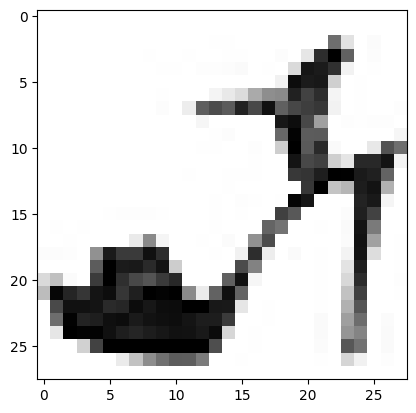

In [9]:
index = 9
np.set_printoptions(linewidth=320)
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')
plt.imshow(train_images[index], cmap='Greys')

In [33]:
# ketika mencapai suatu patokan misal disini adalah loss < 0.4 maka epoch akan stop training, bisa juga patokannya accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\Loss is lower than 0.4 so cancelling training!")
      self.model.stop_training= True

callbacks = myCallback()

In [20]:
# Sequential : that defines a sequence of layers in the neural network
# Flatten : Flatten just takes that square and turns it intoa 1-dimensional array
# Dense : adds a layer of neurons
# Each layer of neurons need an activation function to tell them what to do

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # first layer/ input layer / we input 28x28 pixel aka 784 pixel as an simple linear array
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # mid layer/ hidden layer, we use 128 hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # last layer / output layer, we want 10 class as output
])

In [27]:
# KNOW MORE ABOUT SOFTMAX FUNCT (softmax funct biasa digunakan untuk output layer)
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]]) # misal kita punya 4 class
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs) #list 4 class di atas di ambil dan discale sehingga jika list digabungkan maka = 1
print(f'output of softmax function: {outputs.numpy()}') #value terbesar ketika sudah discale menandakan that the model very confident with the input = value terbesar

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with hightest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with hightest probability: 2


In [34]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', # nilai loss harus turun
              metrics = ['accuracy']) # accurcy harus naik

model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2652 - accuracy: 0.9000


In [32]:
model.evaluate(test_iamges,test_labels) # will return the test loss and accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.3393 - accuracy: 0.8783


[0.33927616477012634, 0.8783000111579895]